In [102]:
import logging
logging.root.setLevel(logging.INFO)


In [103]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [104]:
import random

from xcs.scenarios import Scenario
from xcs.bitstrings import BitString

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


class MazeScenario(Scenario):
    
    def __init__(self, training_cycles=5000, input_size=8):
        self.input_size = input_size
        self.maze = gym.make('Maze5-v0')
        self.possible_actions = (0, 1, 2, 3, 4, 5, 6, 7)
        self.done = False
        self.state = None
        self.reward = 0
        self.state = self.maze.reset()
        self.remaining_cycles = training_cycles
        
        self.steps_array = []
        self.steps = 0

    def reset(self):
        self.done = False
        self.state = self.maze.reset()
        return self.state
        
    # XCS Hosford42 functions
    @property
    def is_dynamic(self):
        return False
        
    def get_possible_actions(self):
        return self.possible_actions
        
    def more(self):
        if self.done:
            self.reset()
            self.remaining_cycles -= 1
            self.steps_array.append(self.steps)
            self.steps = 0
            self.reset()
        return self.remaining_cycles >=0
        
    def sense(self):
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return BitString(''.join(no_reward_state))
    
    def execute(self, action):
        self.steps += 1
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return self.reward

    # XCS Pyalcs functions
    def step(self, action):
        return self.maze.step(action)

In [105]:
training_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(training_cycles, input_size)

In [106]:
algorithm = XCSAlgorithm()
algorithm.exploration_probability = .1
algorithm.discount_factor = 0
algorithm.wildcard_probability = .5
algorithm.do_ga_subsumption = True
algorithm.do_action_set_subsumption = True

In [107]:
model = algorithm.new_model(scenario)
model.run(scenario, learn=True)


In [108]:
print(model)


11###0## => 0
    Time Stamp: 38326
    Average Reward: 500.0
    Error: 308.3333333333333
    Fitness: 0.045988676321369014
    Experience: 6
    Action Set Size: 18.666666666666664
    Numerosity: 1
1##1#### => 2
    Time Stamp: 38331
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.24836232276204642
    Experience: 518
    Action Set Size: 9.105283687215593
    Numerosity: 1
111##1#1 => 2
    Time Stamp: 38041
    Average Reward: 1000.0
    Error: 0.0
    Fitness: 0.3845964706180859
    Experience: 26
    Action Set Size: 11.216821606330608
    Numerosity: 1
######## => 0
    Time Stamp: 38380
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.08748383548041756
    Experience: 6
    Action Set Size: 16.333333333333332
    Numerosity: 2
1110###1 => 2
    Time Stamp: 38041
    Average Reward: 1000.0
    Error: 0.0
    Fitness: 0.5789733223023461
    Experience: 56
    Action Set Size: 11.230580956037086
    Numerosity: 2
#1#10##1 => 0
    Time Stamp: 38303
    Average Reward: 

In [109]:
print(len(model))

20


In [110]:
for rule in model:
    if rule.fitness > .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

######## => 1  [1.00000]
######## => 5  [1.00000]
######## => 4  [1.00000]
######## => 3  [1.00000]
######## => 7  [1.00000]
######## => 6  [1.00000]
######## => 2  [0.49057]
######## => 0  [0.08748]
####1### => 0  [0.32074]
#####1## => 0  [0.74675]
###0#### => 0  [0.42054]
0####### => 2  [0.64482]
11###0#0 => 0  [0.99181]
1110###1 => 2  [0.57897]
1##1#### => 2  [0.24836]
##0##### => 2  [0.74055]
##0##### => 0  [0.50491]
111##1#1 => 2  [0.38460]
#1#10##1 => 0  [0.31130]


In [111]:
from lcs.agents.xcs import XCS, Configuration

cfg = Configuration(number_of_actions=8,
                    gamma=0,
                    metrics_trial_frequency=5,
                    covering_wildcard_chance=0.5
                    )


In [112]:
agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(scenario, training_cycles, False)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.013241000000107306}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': [0.22216238934366633, 0.0, 18.55750487760253, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.01804779999974926}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 22, 'reward': [0.6097820989611553, 0.0, 101.19408810284162, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.007204099999853497}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 19, 'reward': [148.58502194449176, 0.0, 2.0656988452201053, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.006742399999893678}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 33, 'reward': [2.931776380778595, 0.0, 148.136184185694, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 0.012150000000019645}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 50, 'reward': [3.131055589096458, 0.0, 0.0004955884867171367, 0.0, 0.0, 0.0, 0.0, 0.0], 'perf_time': 

In [113]:
for rule in explore_population:
    print(rule)


Cond:10#01### - Act:0 - Num:1 [fit: 0.000, exp: 313.00, pred: 56.005]
Cond:#000#011 - Act:1 - Num:3 [fit: 0.683, exp: 24.00, pred: 0.000]
Cond:1#0##0#1 - Act:2 - Num:3 [fit: 0.000, exp: 1041.00, pred: 26.442]
Cond:#0#0#011 - Act:3 - Num:3 [fit: 0.727, exp: 35.00, pred: 0.000]
Cond:10###01# - Act:4 - Num:2 [fit: 0.217, exp: 197.00, pred: 0.000]
Cond:##00#0#1 - Act:5 - Num:3 [fit: 0.356, exp: 189.00, pred: 0.000]
Cond:##001##1 - Act:6 - Num:3 [fit: 0.429, exp: 91.00, pred: 0.000]
Cond:1##010## - Act:7 - Num:2 [fit: 0.410, exp: 124.00, pred: 0.000]
Cond:#0#10##0 - Act:0 - Num:1 [fit: 0.000, exp: 527.00, pred: 30.466]
Cond:###10##0 - Act:1 - Num:3 [fit: 0.295, exp: 601.00, pred: 0.000]
Cond:###100## - Act:2 - Num:1 [fit: 0.000, exp: 1312.00, pred: 22.659]
Cond:0##10##0 - Act:3 - Num:3 [fit: 0.711, exp: 30.00, pred: 0.000]
Cond:0#0##0#0 - Act:4 - Num:1 [fit: 0.111, exp: 205.00, pred: 0.000]
Cond:######1# - Act:5 - Num:2 [fit: 0.223, exp: 1332.00, pred: 0.000]
Cond:000##0## - Act:6 - Num:2 [

In [114]:
print(len(explore_population))

104


In [115]:
for rule in explore_population:
    if rule.fitness >= .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

#000#011 => 1  [0.68276]
#0#0#011 => 3  [0.72743]
10###01# => 4  [0.21673]
##00#0#1 => 5  [0.35587]
##001##1 => 6  [0.42863]
1##010## => 7  [0.41023]
###10##0 => 1  [0.29505]
0##10##0 => 3  [0.71086]
0#0##0#0 => 4  [0.11064]
######1# => 5  [0.22303]
000##0## => 6  [0.32390]
0##10#10 => 7  [0.71191]
11###### => 1  [0.32107]
11#011#0 => 3  [0.16666]
11#01#00 => 4  [0.19996]
###01#00 => 5  [0.29776]
##00#### => 6  [0.19389]
#10011## => 7  [0.72890]
#010##10 => 1  [0.70930]
0#1#0### => 3  [0.30100]
##0##010 => 4  [0.10505]
0#1###1# => 6  [0.44913]
0#10###0 => 7  [0.45669]
1#00##01 => 3  [0.69390]
1##1010# => 3  [0.63434]
110#01## => 4  [0.53090]
1#0#01#1 => 5  [0.09658]
#####1#1 => 6  [0.41802]
1##1##01 => 7  [0.45632]
1101#0#1 => 3  [0.19996]
1##1000# => 4  [0.19673]
##01##01 => 5  [0.33489]
#001#1## => 1  [0.20412]
#####111 => 3  [0.63612]
###10### => 4  [0.31655]
0##1#1## => 7  [0.54535]
0##01000 => 1  [0.24761]
00#01#00 => 3  [0.70477]
00101##0 => 4  [0.19984]
#010100# => 6  [0.47383]


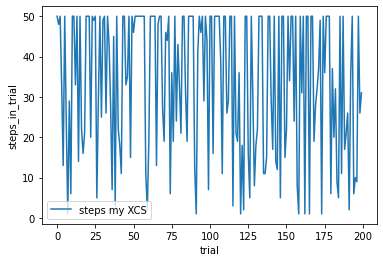

In [116]:
import pandas as pd

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps my XCS"])

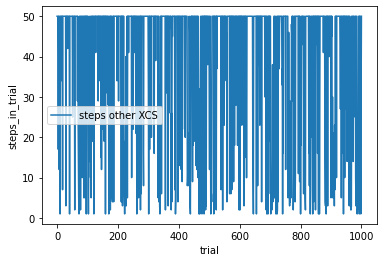

In [117]:
df = pd.DataFrame(scenario.steps_array)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

#### Conclusions
